<a href="https://colab.research.google.com/github/usUpal/image-watermarking/blob/master/Image_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import requests
from PIL import Image

In [2]:
# reading image from url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream = True).raw)

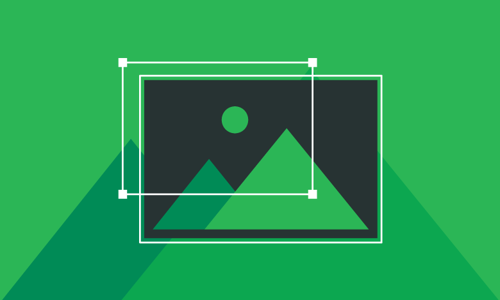

In [3]:
# resize
image_logow= image.resize((500,300))
image_textw= image.resize((500,300))
image_logow

In [4]:
# read logo
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream = True).raw)

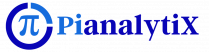

In [5]:
logo

In [6]:
image_logow= np.array(image_logow.convert('RGB'))
h_image,w_image, _ = image_logow.shape

logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [9]:
# get the center of the original; It's the place where we put watermark
center_y = int(h_image/2)
center_x = int(w_image/2)

top_y = center_y - int(h_logo/2)
left_x= center_x - int(w_logo/2)
bottom_y=  top_y + h_logo
right_x=  left_x + w_logo

In [10]:
# Region of Interest (ROI)
# get roi
roi = image_logow[top_y:bottom_y,left_x:right_x]

# add the logo to the roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Drawing
cv2.line(image_logow,(0, center_y), (left_x, center_y), (0,0,225), 1 )
cv2.line(image_logow,(right_x, center_y), (w_image, center_y), (0,0,225), 1 )

# replace the roi on the image
image_logow[top_y:bottom_y, left_x: right_x] = result


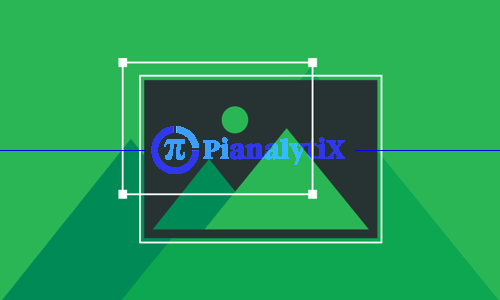

In [11]:
# ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [12]:
# text watermark
image_text = np.array(image_textw.convert('RGB'))

In [13]:
cv2.putText(image_text, text = "upal", org = (w_image - 95, h_image -10), fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.5, color = (0,0,225), thickness = 2, lineType= cv2.LINE_4)

array([[[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       ...,

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 44, 183,  86],
        ...,
        [ 44, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 42, 181,  86],
        ...,
        [ 29, 175,  83],
        [ 44, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 23, 162,  86],
        ...,
        [ 14, 168,  80],
        [ 36, 178,  85],
        [ 44, 182,  86]]

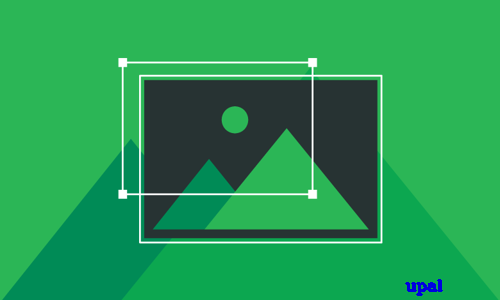

In [14]:
img2 = Image.fromarray(image_text, 'RGB')
img2